<a href="https://colab.research.google.com/github/0jipy/192kbps_colab_JIPY/blob/main/__sinver_IMAGE_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Image Application 

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet import ResNet101

import numpy as np 
from PIL import Image

In [2]:
vgg16 = VGG16()
vgg19 = VGG19()
resnet50 = ResNet50()
resnet101 = ResNet101()

179658752/179648224 [==============================] - 1s 0us/step


In [3]:
from google.colab import files
up = files.upload()

Saving bear.jpg to bear.jpg
Saving crocodile.jpg to crocodile.jpg
Saving dolphin.jpg to dolphin.jpg
Saving eagle.jpg to eagle.jpg
Saving elephant.jpg to elephant.jpg
Saving hawk.jpg to hawk.jpg
Saving lion.jpg to lion.jpg
Saving penguin.jpg to penguin.jpg
Saving shark.jpg to shark.jpg
Saving sparrow.jpg to sparrow.jpg


In [4]:
IMAGE_SIZE = 224

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else:
        width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE

    new_img = np.array(img.resize((width,height)))

    diff = abs(width - height)//2
    if width > height:
        final_img = new_img[:, diff:diff+IMAGE_SIZE, :]
    else:
        final_img = new_img[diff:diff+IMAGE_SIZE, :, :]

    return final_img

In [5]:
# 이미지 예측
lines = []
for fname in up.keys():
    name = fname.split('.')[0]
    img = center_image(Image.open(fname))
    yhat_v16 = vgg16.predict(img.reshape(-1, 224, 224, 3))
    yhat_v19 = vgg19.predict(img.reshape(-1, 224, 224, 3))
    yhat_r50 = resnet50.predict(img.reshape(-1, 224, 224, 3))
    yhat_r101 = resnet101.predict(img.reshape(-1, 224, 224, 3))
    yhat_ens = (yhat_v16 + yhat_v19 + yhat_r50 + yhat_r101) / 4.

    pred_v16 = decode_predictions(yhat_v16)[0][0][1]
    pred_v19 = decode_predictions(yhat_v19)[0][0][1]
    pred_r50 = decode_predictions(yhat_r50)[0][0][1]
    pred_r101 = decode_predictions(yhat_r101)[0][0][1]
    pred_ens = decode_predictions(yhat_ens)[0][0][1]

    lines.append([name, pred_v16, pred_v19, pred_r50, pred_r101, pred_ens])

49152/35363 [=========================================] - 0s 0us/step


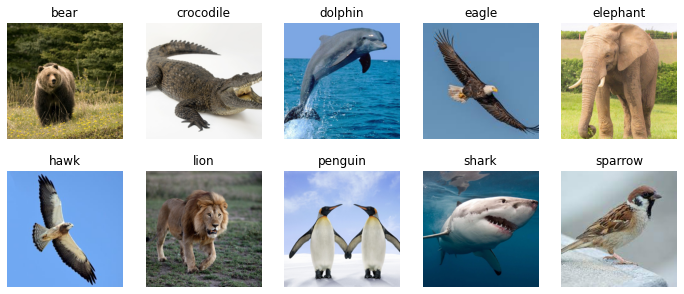

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
for i, fname in enumerate(up.keys()):
    plt.subplot(2,5,i+1)
    plt.imshow(center_image(Image.open(fname)))
    plt.title(fname.split('.')[0]), plt.axis('off')
plt.show()

In [7]:
import pandas as pd
df = pd.DataFrame(lines, columns=['Name','VGG16','VGG19','ResNet50','ResNet101','Ensemble'])
df

,Name,VGG16,VGG19,ResNet50,ResNet101,Ensemble
0,bear,brown_bear,ice_bear,ice_bear,brown_bear,ice_bear
1,crocodile,agama,American_alligator,American_alligator,American_alligator,American_alligator
2,dolphin,dugong,hammerhead,hammerhead,hammerhead,hammerhead
3,eagle,kite,kite,kite,kite,kite
4,elephant,African_elephant,African_elephant,African_elephant,African_elephant,African_elephant
5,hawk,kite,kite,screw,kite,kite
6,lion,lion,lion,lion,lion,lion
7,penguin,king_penguin,king_penguin,king_penguin,king_penguin,king_penguin
8,shark,great_white_shark,great_white_shark,great_white_shark,great_white_shark,great_white_shark
9,sparrow,quail,jay,chickadee,jay,jay
